In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram

To run simulations on the simulators at AQT we import the AQT simulators and access them via a personal access code.

In [2]:
from qiskit.providers.aqt import AQT
aqt = AQT.enable_account('2633b2d14dae4d9da7c9df2503857334')

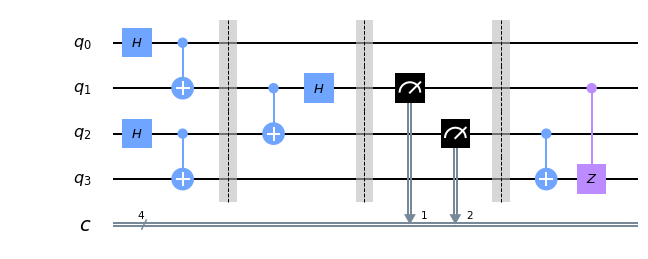

In [3]:
c = QuantumCircuit(4,4)
c.h(0)
c.h(2)
c.cx(0,1)
c.cx(2,3)
c.barrier()
c.cx(1,2)
c.h(1)
c.barrier()
c.measure([1,2],[1,2])
c.barrier()
c.cx(2,3)
c.cz(1,3)
c.draw(output='mpl')

In [4]:
ideal = aqt.get_backend('aqt_qasm_simulator')
noise = aqt.get_backend('aqt_qasm_simulator_noise_1')

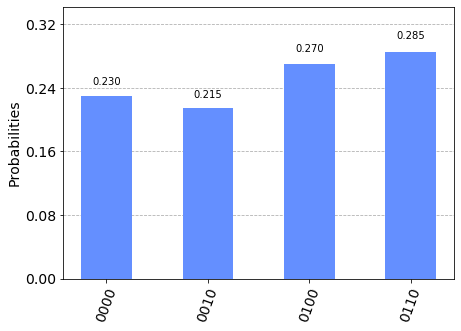

In [5]:
res_ideal = execute(c, ideal, shots=200).result()
plot_histogram(res_ideal.get_counts(c))

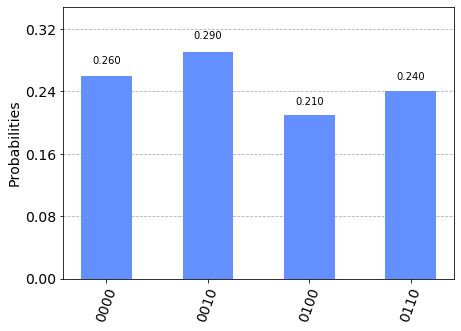

In [6]:
res_noise = execute(c, noise, shots=200).result()
plot_histogram(res_noise.get_counts(c))